In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"D:\sample data\Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [3]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

## adding new column total earning on the basis of qty and price

In [4]:
df["total_earn"]=df['transaction_qty']*df['unit_price']

## adding new column which define product size which extract from product details

In [5]:
df['product_size'] = df['product_detail'].str[-2:]

## 1.Find that which product category is purchase most.

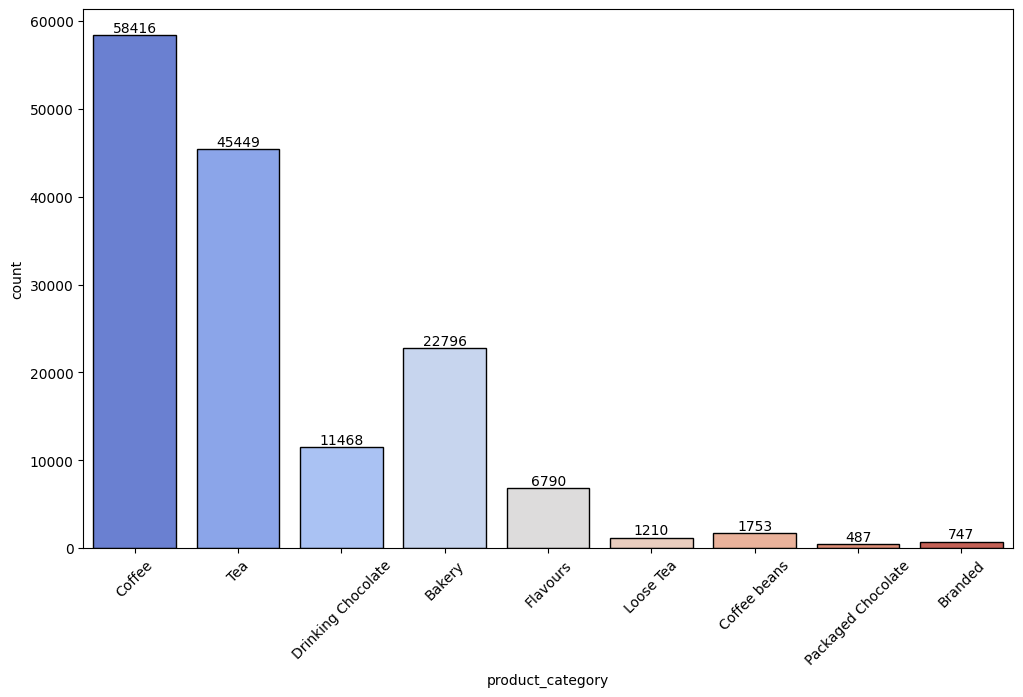

In [18]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x="product_category",data=df,palette="coolwarm",edgecolor="black")
for no in ax.containers:
    ax.bar_label(no)
plt.xticks(rotation=45)
plt.show()

### so in above graph we can see that most purshase category is coffe

## 2.which product category is earning more revenue.

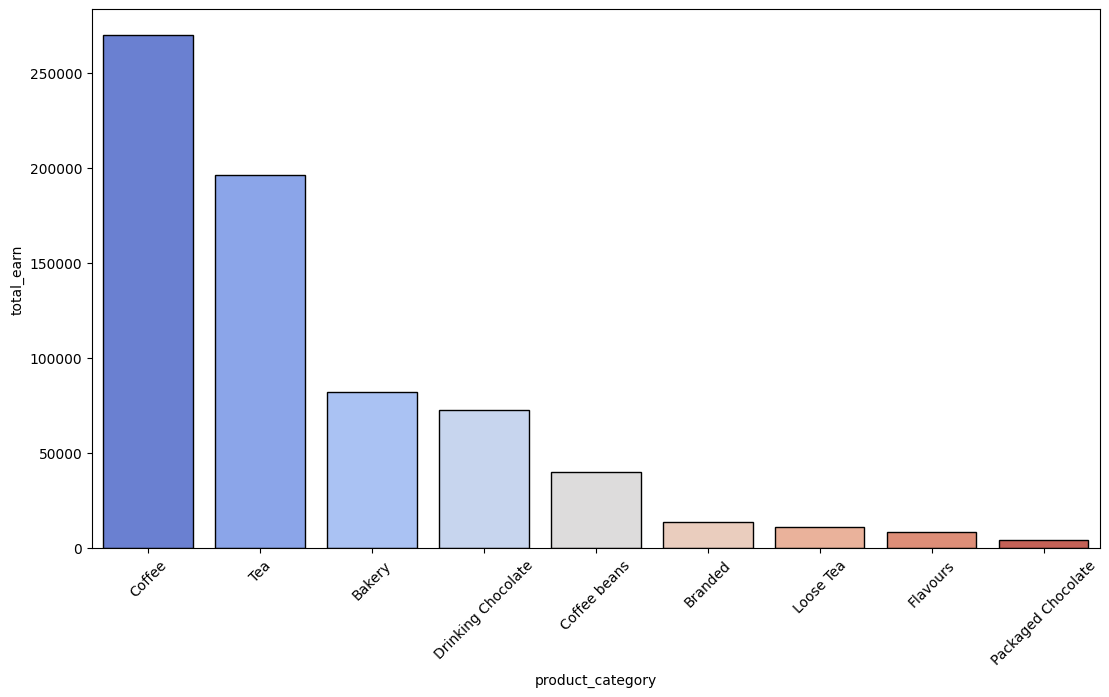

In [20]:
gp=df.groupby(["product_category"]).agg({"total_earn":"sum"}).sort_values(by="total_earn",ascending=False)
plt.figure(figsize=(13,7))
sns.barplot(x="product_category",y="total_earn",data=gp,palette="coolwarm",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

## 3.Which product type is jenerating higher sales. 

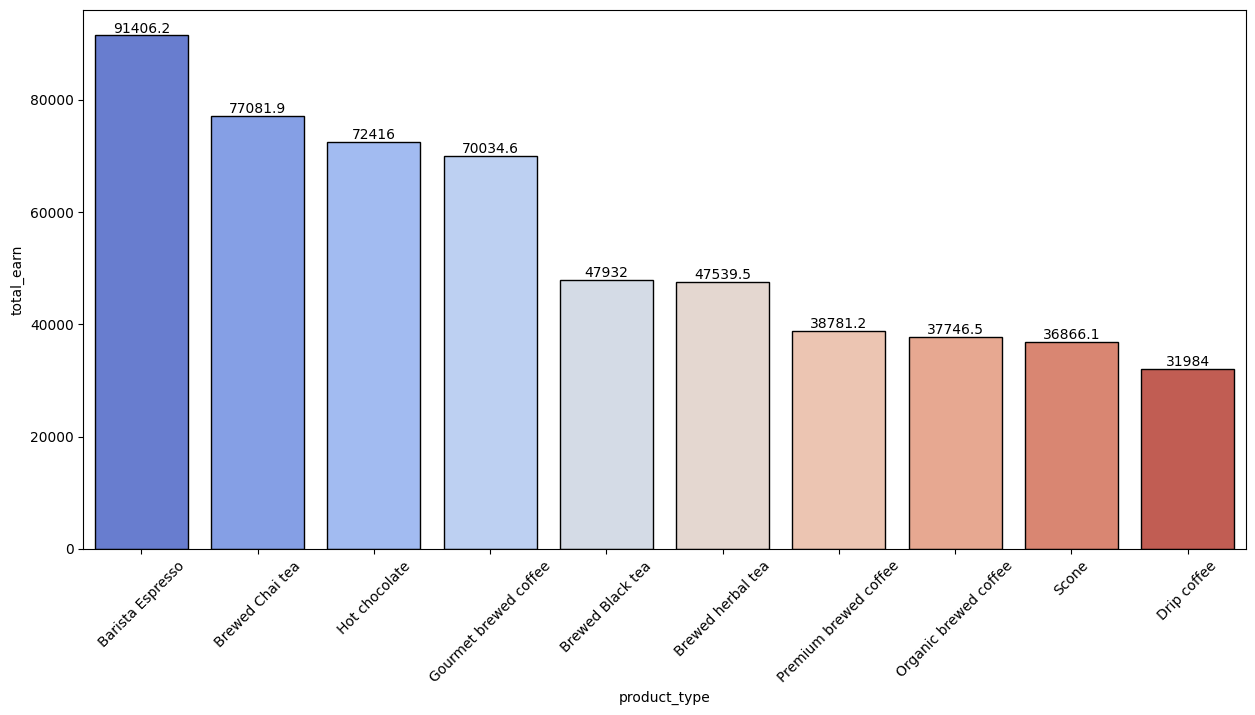

In [23]:
plt.figure(figsize=(15,7))
gp1=df.groupby(["product_type"]).agg({"total_earn":"sum"}).sort_values(by="total_earn",ascending=False).head(10)
ax=sns.barplot(x="product_type",y="total_earn",data=gp1,palette="coolwarm",edgecolor="black")
for n in ax.containers:
    ax.bar_label(n)  
plt.xticks(rotation=45)
plt.show()

### according to above graph we analyse that barista espresso in generating highest revenue

## 4.What are the over all sales trends of every day.

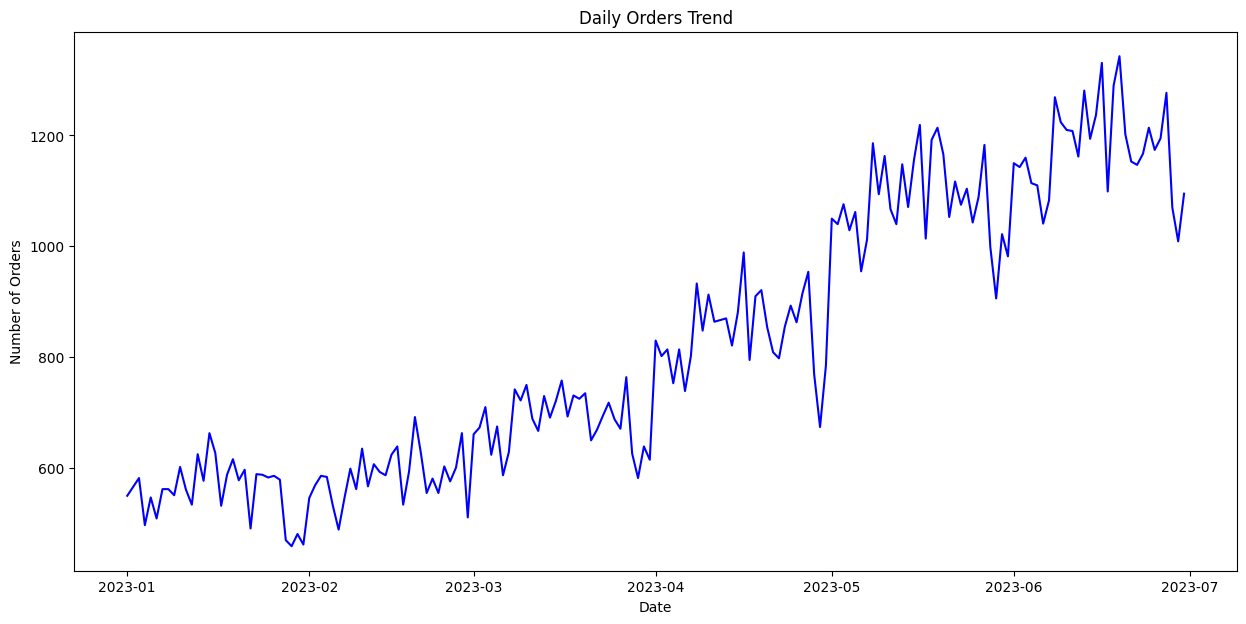

In [25]:
plt.figure(figsize=(15,7))
gp1=df.groupby(["transaction_date"]).agg({"transaction_id":"count"}).sort_values(by="transaction_date",ascending=True)
sns.lineplot(x="transaction_date",y="transaction_id",data=gp1,color='blue')
plt.title('Daily Orders Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

### according to the above chart we analyse that our sales is incresing montly but some small amount of sale in decresing at the end on every month 

## 5.monthly sales trend.

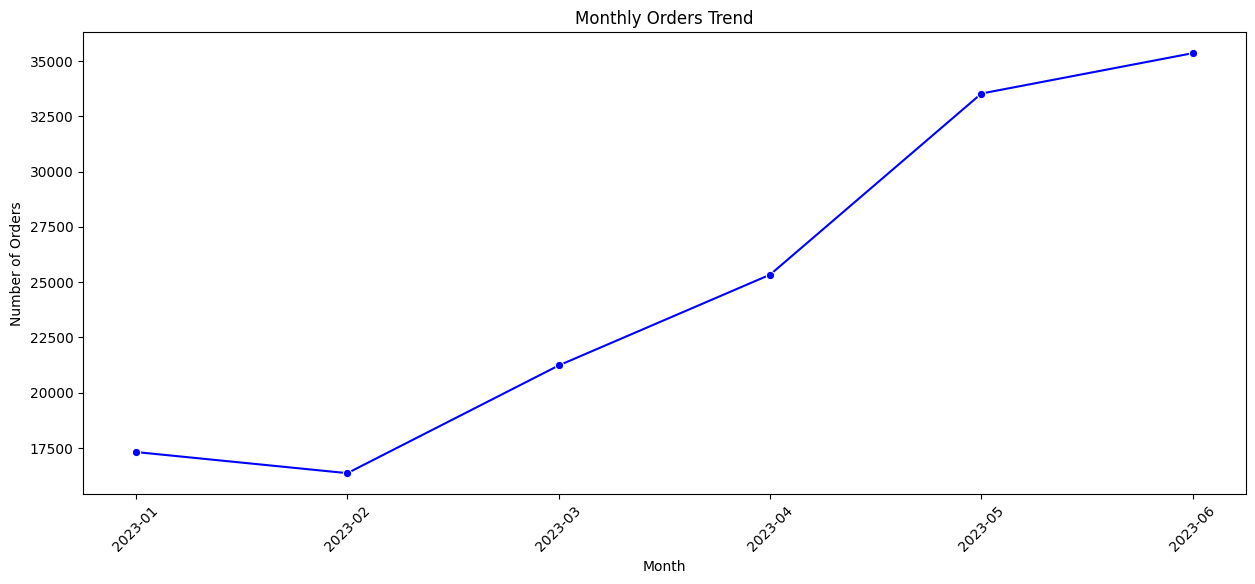

In [27]:
# Convert the transaction_date to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Group by monthly transaction counts and reset index
monthly_orders = df.groupby(df['transaction_date'].dt.to_period("M")).agg({"transaction_id": "count"}).reset_index()

# Convert the Period to string format for proper plotting
monthly_orders['transaction_date'] = monthly_orders['transaction_date'].astype(str)

# Plot the monthly orders trend
plt.figure(figsize=(15, 6))
sns.lineplot(x="transaction_date", y="transaction_id", data=monthly_orders,color="blue",marker='o')

# Add plot labels and formatting
plt.title('Monthly Orders Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


### from above we can identify that the sales is incresing every month

## 6.which product size is ordered most.

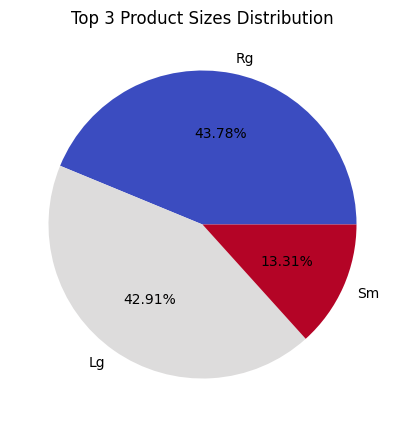

In [29]:

gp2 = df.groupby(df['product_size']).agg({'product_id': 'count'}).sort_values(by="product_id", ascending=False).head(3)

plt.figure(figsize=(5, 5))
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(gp2)))
plt.pie(gp2['product_id'], labels=gp2.index, autopct='%1.2f%%',colors=colors)

# Show the pie chart
plt.title('Top 3 Product Sizes Distribution')
plt.savefig("cus_size.png")
plt.show()

## 7.which locatin area is generating higher revenue.

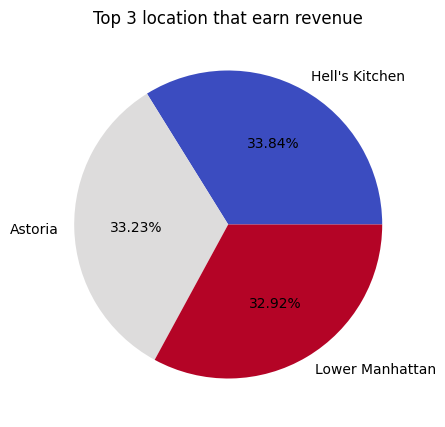

In [28]:
gp2=df.groupby(df['store_location']).agg({"total_earn":"sum"}).sort_values(by="total_earn",ascending=False)
gp2=gp2.rename(columns={'store_location':'location','total_earn':'revenue'})
plt.figure(figsize=(5, 5))
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(gp2)))
plt.pie(gp2['revenue'], labels=gp2.index, autopct='%1.2f%%',colors=colors)

# Show the pie chart
plt.title('Top 3 location that earn revenue')
plt.show()


### according to above graph we can see that all the location are earning approx same revenue

# summary:
 analyse that in product category the coffe is purchased most and generating higher reveneu and brista product type is generating higher revenue, we     analyse that total sale is incresing day by day and monthly and customer mostly purchase lg,Rg size and at the last we see that revenue is generated    approx same from these three locations.  